Датасет - https://www.kaggle.com/uciml/mushroom-classification

Загрузить датасет в Python.  
Описать набор данных и решаемую задачу.  
Выделить целевую переменную и факторные переменные.  
Удалить ненужные данные, проанализировать отсутствующие значения.  
Прокомментировать количественные параметры датасета.  
Разбить выборку на обучающую и тестовую.  
Работа по вариантам.  


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
import time

import warnings
warnings.filterwarnings(action='ignore')

## Подготовительный этап

In [2]:
df = pd.read_csv('./dsets/mushrooms.csv')
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


Факторные переменные:
- форма шляпки (cap-shape)
- поверхность шляпки (cap-surface)
- цвет шляпки (cap-color)
- синева(bruises)
- запах (odor)
- наличие гименофора (gill-attachment)
- расстояние между складками гименофора (gill-spacing)
- размер гименофора (gill-size)
- цвет гименофора (gill-color)
- форма ножки (stalk-shape)
- корень ношки (stalk-root)
- поверхность стебля над "юбочкой" (stalk-surface-above-ring)
- поверхность стебля под "юбочкой" (stalk-surface-below-ring)
- цвет стебля над "юбочкой" (stalk-color-above-ring)
- цвет стебля под "юбочкой" (stalk-color-below-ring)
- тип вуали (veil-type)
- цвет вуали (veil-color)
- количество "юбочек" (ring-number)
- тип "юбочки" (ring-type)
- цвет отпечатка споры (spore-print-color)
- популяция (population)
- среда обитания (habitat)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [4]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [5]:
categorical_cols = df.columns[df.dtypes == object]

df[categorical_cols].apply(lambda s: s.unique())

class                                                     [p, e]
cap-shape                                     [x, b, s, f, k, c]
cap-surface                                         [s, y, f, g]
cap-color                         [n, y, w, g, e, p, b, u, c, r]
bruises                                                   [t, f]
odor                                 [p, a, l, n, f, c, y, s, m]
gill-attachment                                           [f, a]
gill-spacing                                              [c, w]
gill-size                                                 [n, b]
gill-color                  [k, n, g, p, w, h, u, e, b, r, y, o]
stalk-shape                                               [e, t]
stalk-root                                       [e, c, b, r, ?]
stalk-surface-above-ring                            [s, f, k, y]
stalk-surface-below-ring                            [s, f, y, k]
stalk-color-above-ring               [w, g, p, n, b, e, o, c, y]
stalk-color-below-ring   

Этот набор данных включает описания гипотетических образцов, соответствующих 23 видам жаберных грибов семейства Agaricus и Lepiota, взятых из "Полевого справочника по грибам Северной Америки" Общества Одюбона (1981). Каждый вид идентифицирован как определенно съедобный, определенно ядовитый или неизвестно съедобный и не рекомендуемый. Последний класс был объединен с ядовитым. В справочнике четко сказано, что не существует простого правила для определения съедобности гриба; нет такого правила, как "три листочка, пусть будет" для ядовитых дуба и плюща.

В данной работе целевой переменной определим class, а именно будем определять, съедобен ли гриб (e, edible) или нет(p, poisonous). Задача на классификацию. 

In [6]:
df.shape

(8124, 23)

Датасет состоит из 23 колонок - 22 признака и 1 целевая переменная и 8124 строки.

## Анализ данных

Проверка полноты данных (обработка нулевых значений)

In [7]:
df.isnull().sum() #никакие данные не пропущены

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

Распределение целевой переменной

In [8]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

<AxesSubplot:>

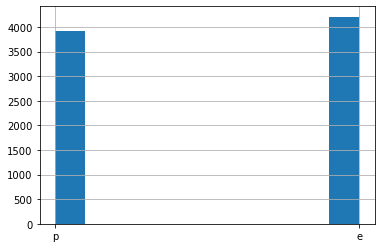

In [9]:
df['class'].hist() # данные съедобных и несъедобных примерно на одном уровне, что очень хорошо. 
# Примерно распределение на съедобные/несъедобные 50/50

In [10]:
def Bar_4(x):
    plt.figure(figsize=(18,8))
    plt.subplot(2,2,1)
    sns.countplot(df[x[0]])

    plt.subplot(2,2,2)
    sns.countplot(df[x[1]])

    plt.subplot(2,2,3)
    sns.countplot(df[x[2]])

    
    plt.subplot(2,2,4)
    sns.countplot(df[x[3]])

def Bar_6(x):
    plt.figure(figsize=(18,12))
    plt.subplot(3,2,1)
    sns.countplot(df[x[0]])

    plt.subplot(3,2,2)
    sns.countplot(df[x[1]])

    plt.subplot(3,2,3)
    sns.countplot(df[x[2]])

    plt.subplot(3,2,4)
    sns.countplot(df[x[3]])
    
    plt.subplot(3,2,5)
    sns.countplot(df[x[4]])
    
    plt.subplot(3,2,6)
    sns.countplot(df[x[5]])

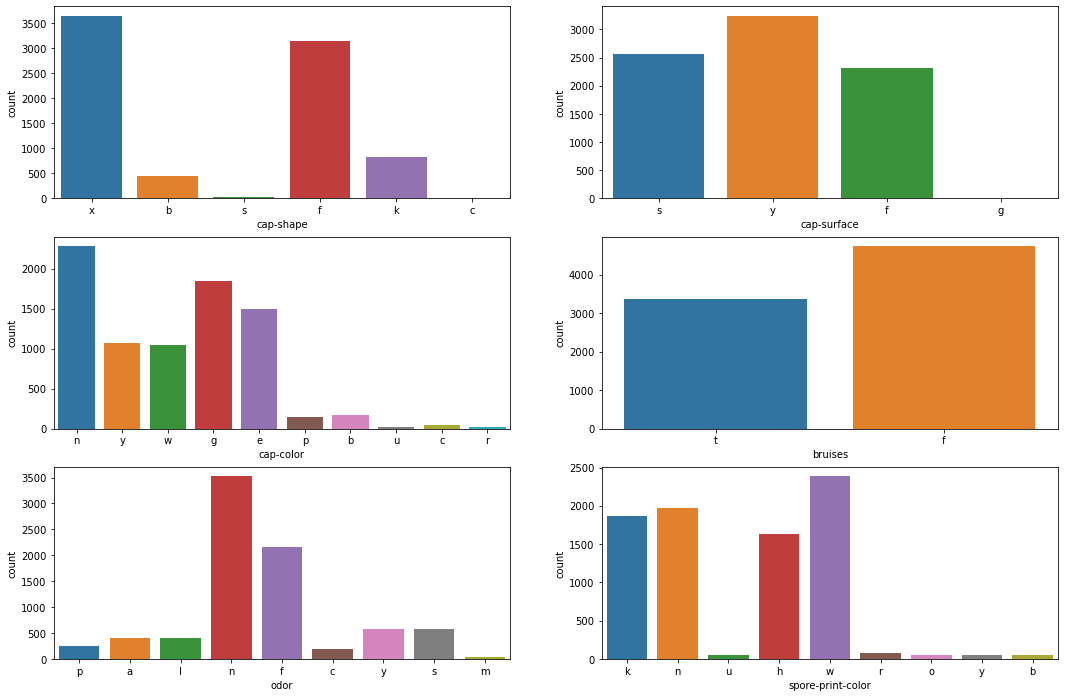

In [11]:
Bar_6(['cap-shape','cap-surface','cap-color','bruises', 'odor', 'spore-print-color'])

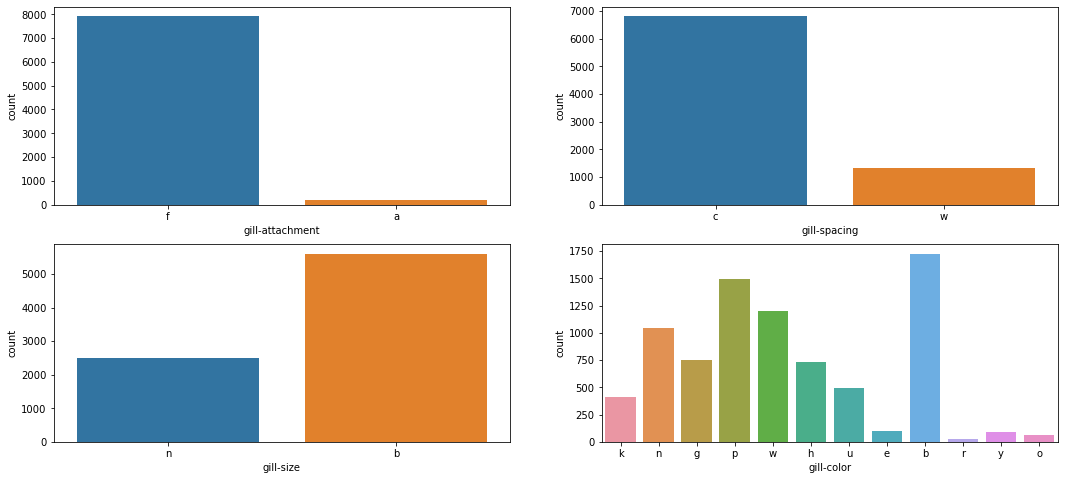

In [12]:
Bar_4(['gill-attachment','gill-spacing','gill-size', 'gill-color'])

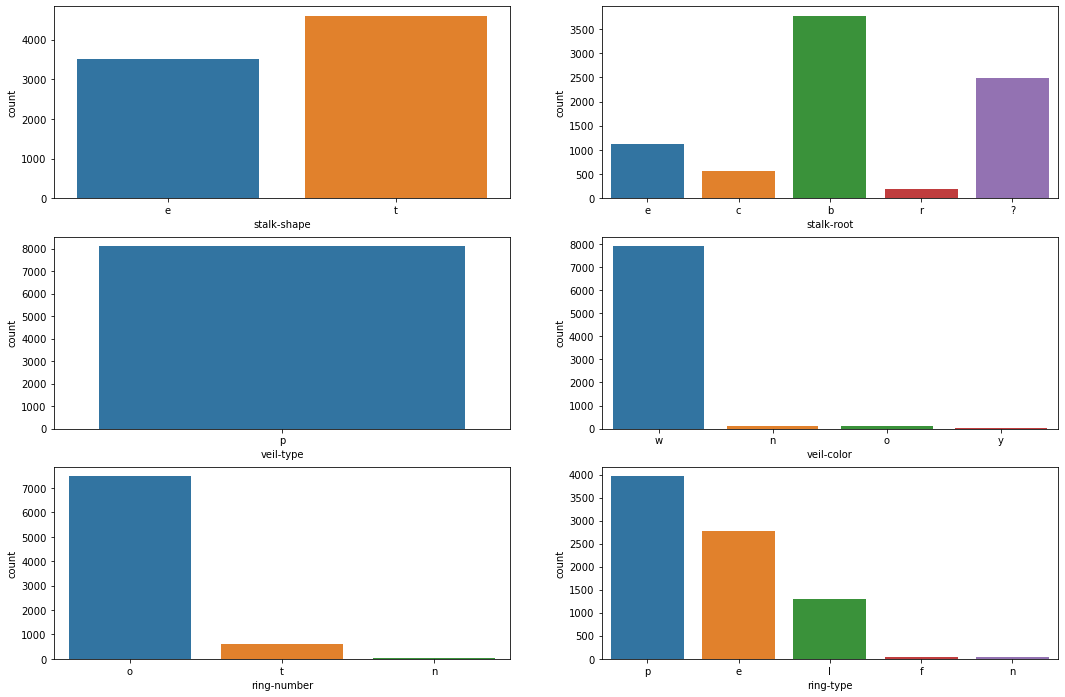

In [13]:
Bar_6(['stalk-shape','stalk-root', 'veil-type','veil-color','ring-number','ring-type'])

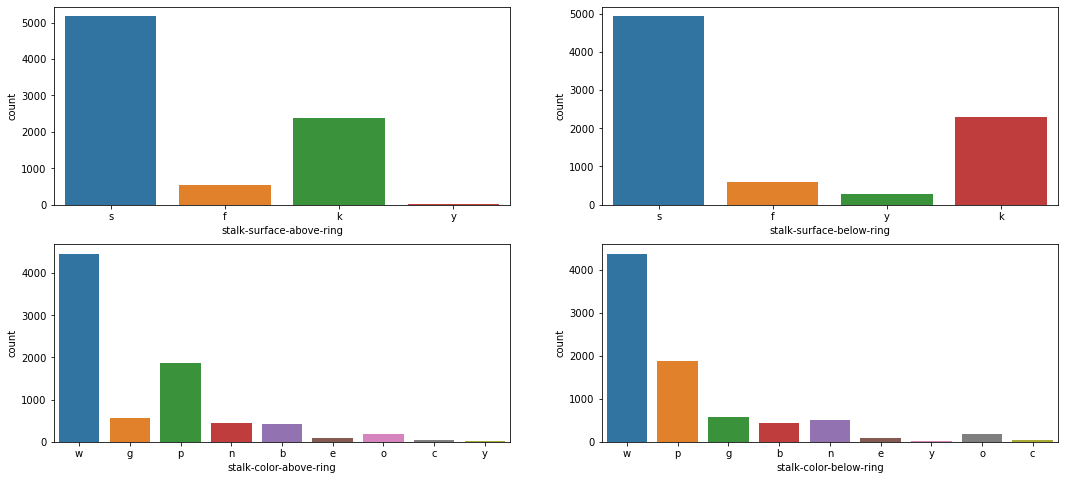

In [14]:
Bar_4(['stalk-surface-above-ring','stalk-surface-below-ring','stalk-color-above-ring','stalk-color-below-ring'])

<AxesSubplot:xlabel='habitat', ylabel='count'>

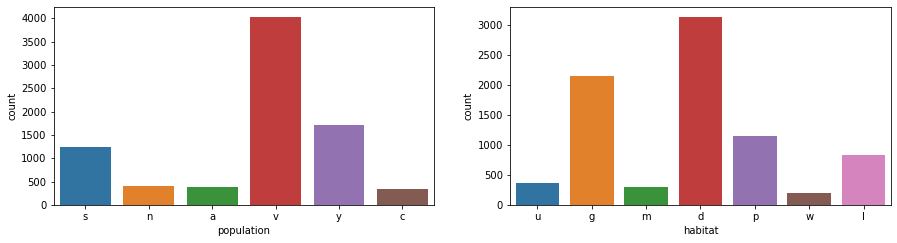

In [15]:
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
sns.countplot(df['population'])

plt.subplot(2,2,2)
sns.countplot(df['habitat'])

Обратим внимание на veil-type

In [16]:
df['veil-type'].value_counts()
# это константа. В ней нет смысла, поэтому удалим ее. 

df = df.drop('veil-type', axis=1)

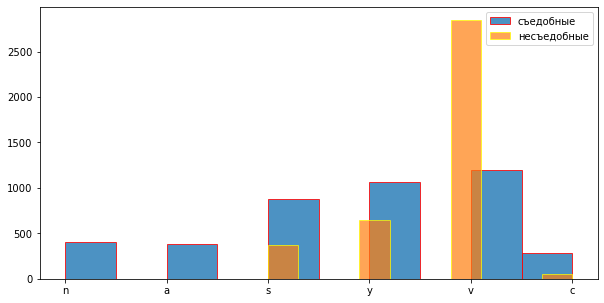

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.lib.histograms import histogram
  
plt.figure(figsize=(10,5))
series1 = df[df['class'] == 'e'].population
series2 = df[df['class'] == 'p'].population
plt.hist(series1, label='cъедобные', alpha=.8, edgecolor='red')
plt.hist(series2, label='несъедобные', alpha=0.7, edgecolor='yellow')
plt.legend()
plt.show()

Несъедобные растут по несколько вместе чаще всего, но совсем небольшими скоплениями. Нередко и поодиночке. Съедобные, наоборот, чаще многочислены. 

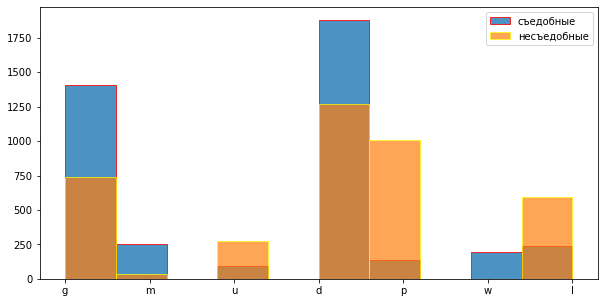

In [18]:
plt.figure(figsize=(10,5))
series1 = df[df['class'] == 'e'].habitat
series2 = df[df['class'] == 'p'].habitat
plt.hist(series1, label='cъедобные', alpha=.8, edgecolor='red')
plt.hist(series2, label='несъедобные', alpha=0.7, edgecolor='yellow')
plt.legend()
plt.show()

Несъедобные нередко растут у трапинок и среди листьев, а также чаще встречаются у города. Съедобные, наоборот, чаще среди травы в лесу. 

Так как все признаки категориальные, более того номинальные. Поэтому используем One Hot Encoder (get_dummies).

In [19]:
y = df['class']
df_features = df.drop('class',axis=1)
df_features = pd.get_dummies(df_features)
df_features

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
8121,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0


Работа с целевой переменной

In [20]:
lb = LabelBinarizer()
y = lb.fit_transform(y)
y

array([[1],
       [0],
       [0],
       ...,
       [0],
       [1],
       [0]])

Разделение датасета на обучающую и тестовую выборку

In [21]:
x_train, x_test, y_train,y_test = train_test_split(df_features,y,random_state=41,test_size=.3)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((5686, 116), (2438, 116), (5686, 1), (2438, 1))

## Построение простых моделей

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support

In [23]:
def metrics_for_cl(clf, X_test, y_test, model_name, time):
    y_ = clf.predict(X_test)
    accuracy_score_ = accuracy_score(y_test, y_)
    precision_recall_fscore_support_ = precision_recall_fscore_support(y_test, y_, average='macro')
    report = pd.DataFrame(list(precision_recall_fscore_support_) + [accuracy_score_, time], 
                          columns=[model_name],
                index=['Precision', 'Recall', 'F1-score', 'Support', 'Accuracy', 'time'])
    report = report.drop('Support')
    

    return report

Логистическая регрессия

In [24]:
start = time.time()
logreg_clf = LogisticRegression()
logreg_clf.fit(x_train, y_train)
stop = time.time()
learning_time = f"{(stop - start):.2}s"

lg_metrics = metrics_for_cl(logreg_clf, x_test, y_test, 'LogisticRegression', learning_time)

Метод опорных векторов

In [25]:
start = time.time()
SVC_model = SVC()
SVC_model.fit(x_train, y_train)
stop = time.time()
learning_time = f"{(stop - start):.2}s"

svm_metrics = metrics_for_cl(SVC_model, x_test, y_test, 'SVC', learning_time)

Метод к-ближайших соседей

In [26]:
start = time.time()
KNN_model = KNeighborsClassifier(n_neighbors=5)
KNN_model.fit(x_train, y_train)
stop = time.time()
learning_time = f"{(stop - start):.2}s"

metric = metrics_for_cl(KNN_model, x_test, y_test, 'KNeighborsClassifier', learning_time)

Decision Tree Classifier

In [27]:
start = time.time()
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)
stop = time.time()
learning_time = f"{(stop - start):.2}s"

y_pred = dt_model.predict(x_test)
tree_metric = metrics_for_cl(dt_model, x_test, y_test, 'DecisionTreeClassifier', learning_time)

Random Forest Classifier

In [28]:
start = time.time()
randtree = RandomForestClassifier().fit(x_train, y_train)
stop = time.time()
learning_time = f"{(stop - start):.2}s"

randtree_metric = metrics_for_cl(randtree, x_test, y_test, 'RandomForestClassifier', learning_time)

## Cравнение и анализ моделей

In [29]:
lg_metrics.join([svm_metrics, tree_metric, randtree_metric])

,LogisticRegression,SVC,DecisionTreeClassifier,RandomForestClassifier
Precision,1.0,1.0,1.0,1.0
Recall,1.0,1.0,1.0,1.0
F1-score,1.0,1.0,1.0,1.0
Accuracy,1.0,1.0,1.0,1.0
time,0.29s,1.3s,0.035s,0.42s


Все модели показали отличные результаты

## Выводы

Можно использовать любую из моделей. Но DecisionTreeClassifier самая быстрая. 

## Построение моделей с учетом выводов

In [64]:
from sklearn.model_selection import GridSearchCV

params = {'max_leaf_nodes': np.linspace(2,100,38, dtype=int), 
          'min_samples_split': [2, 3, 4],
          'criterion':['gini', 'entropy'],
           'max_features' : ['auto', 'sqrt', 'log2']}

start = time.time()
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)
grid_search_cv.fit(x_train, y_train)
stop = time.time()
print(f"Время обучения: {(stop - start):.2}s")



Fitting 3 folds for each of 684 candidates, totalling 2052 fits
Время обучения: 3.1e+01s


In [65]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(max_features='auto', max_leaf_nodes=41, random_state=42)

In [66]:
grid_search_cv.best_params_

{'criterion': 'gini',
 'max_features': 'auto',
 'max_leaf_nodes': 41,
 'min_samples_split': 2}

## Итоговый результат

In [74]:
start = time.time()
dt_model = DecisionTreeClassifier(criterion = 'gini', 
                                  max_features = 'auto',
                                  max_leaf_nodes = 41,
                                  min_samples_split = 2,
                                  random_state=42)
dt_model.fit(x_train, y_train)
stop = time.time()
learning_time = f"{(stop - start):.2}s"

y_pred = dt_model.predict(x_test)
tree_metric = metrics_for_cl(dt_model, x_test, y_test, 'DecisionTreeClassifier', learning_time)

In [75]:
tree_metric

,DecisionTreeClassifier
Precision,1.0
Recall,1.0
F1-score,1.0
Accuracy,1.0
time,0.016s


In [76]:
dt_prediction = dt_model.predict(x_test)

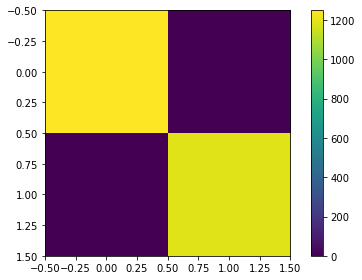

In [77]:
cf_m = confusion_matrix(y_test, dt_prediction)
                
class_names = np.unique(y)  
num_classes = class_names.size        
    
# plt.figure(figsize=(,8))
plt.imshow(cf_m)
plt.tight_layout()
plt.colorbar()
plt.show()

In [78]:
print(classification_report(y_test, dt_prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1249
           1       1.00      1.00      1.00      1189

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438

